In [87]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

## Выделение гармонической части гамильтониана
$\frac{H}{E_J}=\frac{p^2}{2ME_J}+\frac{(\varphi-\varphi_{ex})^2}{2lq}+(1-\cos{\varphi})$

Считаем, что импульс в единицах $p_{old} = p_{new}\sqrt{ME_J}$, тогда 
$\frac{p_{old}^2}{2ME_J} = \frac{p_{new}^2}{2} =\frac{p^2}{2} $, а координата $\varphi_{old} = \varphi_{new}\sqrt{lq} = \varphi\sqrt{lq}$.

$\frac{H}{E_J}=\frac{p^2}{2}+\frac{\varphi^2}{2}-\frac{\varphi_{ex}\varphi}{\sqrt{lq}}+\frac{\varphi_{ex}^2}{2lq}+(1-\cos{\varphi\sqrt{lq}})$

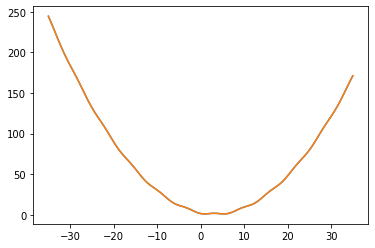

In [88]:
# phix - сдвиг по координате. перенормировка переменной будет влиять на пареметры phix?
def U(phi):
    return (phi - phix)**2/(2*lq) + 1 - np.cos(phi)

def U1(x, n):
    s = 0
    for i in range(1,n+1):
         s = s+ (-1)**(i-1)*x**(2*i-2)/np.math.factorial(2*i-2)
    return (x - phix)**2/(2*lq) + 1 - s

phix = np.pi
lq = 3
x_start = -35
x_end = 35
x = np.linspace(x_start, x_end, 100)
plt.plot(x, U(x))
plt.plot(x, U1(x, 55))
plt.show()

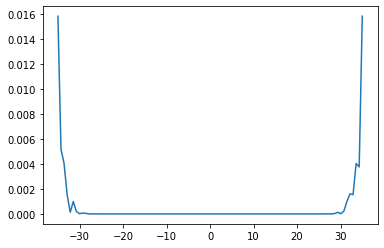

In [89]:
#проверка точности совпадения
plt.plot(x, np.abs(U(x)-U1(x, 55)))
plt.show()

 ## Переход к операторам рождения и уничтожения

$x_{new} = \frac{a+a^+}{\sqrt2}$

$\frac{H}{E_J} = N + (3/2+\frac{\varphi_{ex}^2}{2lq})E - \frac{\varphi_{ex}}{\sqrt{2lq}}(a+a^+) -\cos(\sqrt{\frac{lq}{2}}(a+a^+)
) $

In [90]:
# функция разложения в ряд порядка n

def tay_cos(x,n):
    s = 0
    for i in range(1,n+1):
         s = s + (-1)**(i-1)*np.linalg.matrix_power(x,2*i-2)/np.math.factorial(2*i-2)
    return s

In [105]:
S = 1000 #размерность матрицы   
#S_test = 10000
 
# параметры графика
width = 8
high = 6

In [106]:
def N(S):
    N = np.zeros((S,S))
    for i in range(1,S):
        N[i][i] = i
    return N

def a_crtn(S):
    a_crtn = np.zeros((S,S))
    for i in range(1,S):
        a_crtn[i-1][i] = np.sqrt(i)
    return a_crtn
    
def a_anh(S):
    a_anh = np.zeros((S,S))
    for i in range(1,S):
        a_anh[i][i-1] = np.sqrt(i)
    return a_anh

# используем в основном a_crtn + a_anh = a
def a(S):
    a = np.zeros((S,S))
    for i in range(1,S):
        a[i-1][i] = a[i][i-1] = np.sqrt(i)
    return a
#H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - phix/np.sqrt(2*lq)*a(S)-np.cos(np.sqrt(lq/2)*a(S))
#H_test = N(S_test) + (3/2 + phix**2/(2*lq))*np.eye(S_test) - phix/np.sqrt(2*lq)*a(S_test)-np.cos(np.sqrt(lq/2)*a(S_test))
 

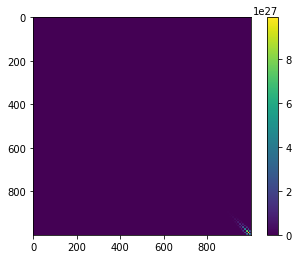

In [107]:
# матрица косинуса
cos_a = tay_cos(np.sqrt(lq/2)*a(S), 55).astype('float64')
#----------------------------------------------------
# вырисовка матрицы косинуса
plt.imshow(cos_a)
plt.colorbar()
plt.show()

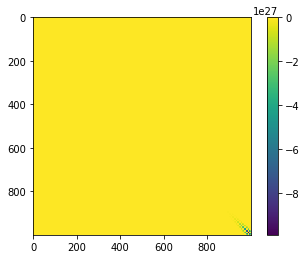

In [108]:
H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - (phix/np.sqrt(2*lq))*a(S) - cos_a
#----------------------------------------------------
# вырисовка матрицы гамильтониана
plt.imshow(H)
plt.colorbar()
plt.show()

In [109]:
eigvals, eigvecs = np.linalg.eigh(H)

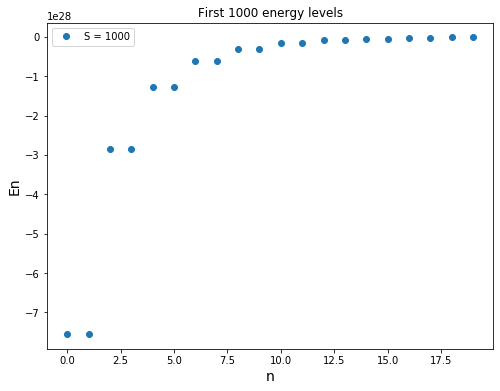

In [110]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals[:20], 'o',label="S = {}".format(S))
#plt.plot(eigvals_test[:en_plot_num], 'o',label="S_test = {}".format(S_test))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

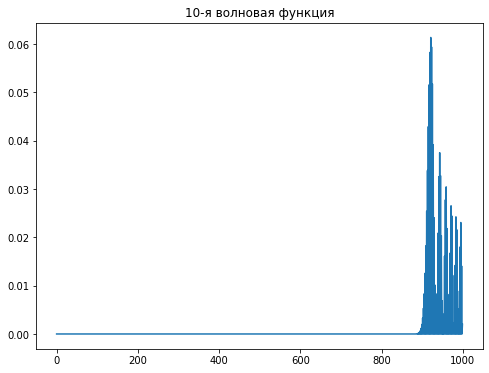

In [111]:
num = 10 
plt.figure(figsize=(width, high))
plt.plot(eigvecs[:,num]**2,label="Current line {} ".format(20)) 
plt.title('{}-я волновая функция'.format(num))
plt.show()